<a href="https://colab.research.google.com/github/vikasvr1997/fmml2021/blob/main/Module2_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **FOUNDATIONS OF MODERN MACHINE LEARNING, IIIT Hyderabad**
### MODULE 2: Feature Normalization, Nearest Neighbor Revisited
### Project: Binary Classification of Adults 
#### Module Coordinator: Tanvi Kamble

---

This projects requires you to apply the machine learning cocepts that you learnt so far to fill in the #TODO parts so that we can classify which income group an adult lies in. 

An adult's income can be determined by a lot of factors like the individual’s education level, age, gender, occupation, and etc. We use a dataset prsent on Kaggle provided by [UCI](http://www.cs.toronto.edu/~delve/data/adult/desc.html) to perform KNN and find the income group. 

First let's open the dataset stored as a CSV file using pandas dataframe, stored in google drive.

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [5]:
adult = pd.read_csv('/content/drive/MyDrive/adult.csv')

In [6]:
# Looking at the dataset
adult.head(10)

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K
5,34,Private,198693,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K
6,29,?,227026,HS-grad,9,Never-married,?,Unmarried,Black,Male,0,0,40,United-States,<=50K
7,63,Self-emp-not-inc,104626,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,3103,0,32,United-States,>50K
8,24,Private,369667,Some-college,10,Never-married,Other-service,Unmarried,White,Female,0,0,40,United-States,<=50K
9,55,Private,104996,7th-8th,4,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,10,United-States,<=50K


In [7]:
# Removing duplicate entries
adult=adult.drop_duplicates()

In [8]:
# Let's get to know the dataset
adult.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48790 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48790 non-null  int64 
 1   workclass        48790 non-null  object
 2   fnlwgt           48790 non-null  int64 
 3   education        48790 non-null  object
 4   educational-num  48790 non-null  int64 
 5   marital-status   48790 non-null  object
 6   occupation       48790 non-null  object
 7   relationship     48790 non-null  object
 8   race             48790 non-null  object
 9   gender           48790 non-null  object
 10  capital-gain     48790 non-null  int64 
 11  capital-loss     48790 non-null  int64 
 12  hours-per-week   48790 non-null  int64 
 13  native-country   48790 non-null  object
 14  income           48790 non-null  object
dtypes: int64(6), object(9)
memory usage: 6.0+ MB


In [9]:
adult.describe().T

,count,mean,std,min,25%,50%,75%,max
age,48790.0,38.652798,13.708493,17.0,28.0,37.0,48.00,90.0
fnlwgt,48790.0,189668.999365,105617.231232,12285.0,117555.0,178138.5,237606.25,1490400.0
educational-num,48790.0,10.078807,2.570046,1.0,9.0,10.0,12.00,16.0
capital-gain,48790.0,1080.217688,7455.905921,0.0,0.0,0.0,0.00,99999.0
capital-loss,48790.0,87.595573,403.209129,0.0,0.0,0.0,0.00,4356.0
hours-per-week,48790.0,40.425886,12.392729,1.0,40.0,40.0,45.00,99.0


In [10]:
# Adding Index Column so that each entry is identified independently
adult['Index'] = range(1, len(adult) + 1)

In [11]:
adult = adult.set_index('Index')

This dataset has '?' in place of all Null entries. Let's find the total null entries.

In [12]:
adult.isin(['?']).sum()

age                   0
workclass          2795
fnlwgt                0
education             0
educational-num       0
marital-status        0
occupation         2805
relationship          0
race                  0
gender                0
capital-gain          0
capital-loss          0
hours-per-week        0
native-country      856
income                0
dtype: int64

In [13]:
df = adult.copy()

In [14]:
df['income'] = df['income'].replace('nan', np.nan)
df = df[df['income'].isin([np.nan]) == False]

In [15]:
#  Three classes called Workclass, Occupation and Native-Country have null values so we first replace it with np.nan. 
df['workclass']=df['workclass'].replace('?',np.nan)
df['occupation']=df['occupation'].replace('?',np.nan)
df['native-country']=df['native-country'].replace('?',np.nan)

These three features are categorical in nature so performing Imputation based KNN will be the best option to find out the missing features. 

In [16]:
from sklearn.preprocessing import LabelEncoder
lb=LabelEncoder()
df.education=lb.fit_transform(df.education)
df['marital-status']=lb.fit_transform(df['marital-status'])
df.relationship=lb.fit_transform(df.relationship)
df.race=lb.fit_transform(df.race)
df.gender=lb.fit_transform(df.gender)
df.income=lb.fit_transform(df.income)

In [17]:
df.isin([np.nan]).sum()

age                   0
workclass          2795
fnlwgt                0
education             0
educational-num       0
marital-status        0
occupation         2805
relationship          0
race                  0
gender                0
capital-gain          0
capital-loss          0
hours-per-week        0
native-country      856
income                0
dtype: int64

In [18]:
# For the NULL values of capital loss and hours per week feature perfrom imputation by mean. 
df['capital-loss'] = df.mean()  
df['hours-per-week'] = df.mean()   
df['capital-loss']


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  This is separate from the ipykernel package so we can avoid doing imports until


Index
1       NaN
2       NaN
3       NaN
4       NaN
5       NaN
         ..
48786   NaN
48787   NaN
48788   NaN
48789   NaN
48790   NaN
Name: capital-loss, Length: 48790, dtype: float64

In [19]:
df['hours-per-week']

Index
1       NaN
2       NaN
3       NaN
4       NaN
5       NaN
         ..
48786   NaN
48787   NaN
48788   NaN
48789   NaN
48790   NaN
Name: hours-per-week, Length: 48790, dtype: float64

In [20]:
# IMPUTATION USING K-NN
# Workclass
import sys
from ipykernel import kernelapp as app
x_train_workclass = df.loc[df['workclass'].isin([np.nan]) == False].drop(['workclass', 'occupation', 'native-country'], axis = 1) 
y_train_workclass = df.loc[df['workclass'].isin([np.nan]) == False].workclass
y_train_workclass = lb.fit_transform(y_train_workclass)
for itr, ind in enumerate(x_train_workclass.index):
  df['workclass'][ind] = y_train_workclass[itr]
x_test_workclass = df.loc[df['workclass'].isin([np.nan])].drop(['workclass', 'occupation', 'native-country'], axis = 1) 
# Occupation
x_train_occupation = df.loc[df['occupation'].isin([np.nan]) == False].drop(['workclass', 'occupation', 'native-country'], axis = 1) 
y_train_occupation = df.loc[df['occupation'].isin([np.nan]) == False].occupation
y_train_occupation = lb.fit_transform(y_train_occupation)
for itr, ind in enumerate(x_train_occupation.index):
  df['occupation'][ind] = y_train_occupation[itr]
x_test_occupation = df.loc[df['occupation'].isin([np.nan])].drop(['workclass', 'occupation', 'native-country'], axis = 1) 
# Native Country
x_train_country = df.loc[df['native-country'].isin([np.nan]) == False].drop(['workclass', 'occupation', 'native-country'], axis = 1) 
y_train_country = df.loc[df['native-country'].isin([np.nan]) == False]['native-country']
y_train_country = lb.fit_transform(y_train_country)
for itr, ind in enumerate(x_train_country.index):
  df['native-country'][ind] = y_train_country[itr]
x_test_country = df.loc[df['native-country'].isin([np.nan])].drop(['workclass', 'occupation', 'native-country'], axis = 1) 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [21]:
from sklearn.neighbors import KNeighborsClassifier

In [22]:
# calculating predictions for all the features
#  Use the KNeighborsClassifier with neighbours = 7 and all the other entries as default to find the missing values.
'''
 TODO:
 for each of the features:
  define a knn classifier with k = 7 
  Fit the training data into the model 
  find the predictions

'''
workplace_pred = None
occupation_pred = None
country_pred = None
from sklearn.model_selection import train_test_split
array = df.values
X = array[:, 0:14]
y = array[:, 14]
#split dataset into train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state =0)


In [23]:
from sklearn.preprocessing import StandardScaler
st_X = StandardScaler()

X_train = st_X.fit_transform(X_train)
X_test = st_X.transform(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/extmath.py:985: RuntimeWarning: invalid value encountered in true_divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
/usr/local/lib/python3.7/dist-packages/sklearn/utils/extmath.py:990: RuntimeWarning: invalid value encountered in true_divide
  T = new_sum / new_sample_count
/usr/local/lib/python3.7/dist-packages/sklearn/utils/extmath.py:1020: RuntimeWarning: invalid value encountered in true_divide
  new_unnormalized_variance -= correction ** 2 / new_sample_count


In [24]:
from sklearn.neighbors import KNeighborsClassifier
# Create KNN classifier
classifier = KNeighborsClassifier(n_neighbors= 7)
classifier.fit(X_train, y_train)
predictions = knn.predict(X_test)

ValueError: ignored

In [ ]:
# Replacing the predicted values in the original dataframe
for itr, ind in enumerate(x_test_workclass.index):
   df['workclass'][ind] = workplace_pred[itr]

for itr, ind in enumerate(x_test_occupation.index):
  df['occupation'][ind] = occupation_pred[itr]

for itr, ind in enumerate(x_test_country.index):
  df['native-country'][ind] = country_pred[itr]

TypeError: ignored

In [ ]:
df['workclass'] = df['workclass'].astype(str).astype(int)
df['occupation'] = df['occupation'].astype(str).astype(int)
df['native-country'] = df['native-country'].astype(str).astype(int)

ValueError: ignored

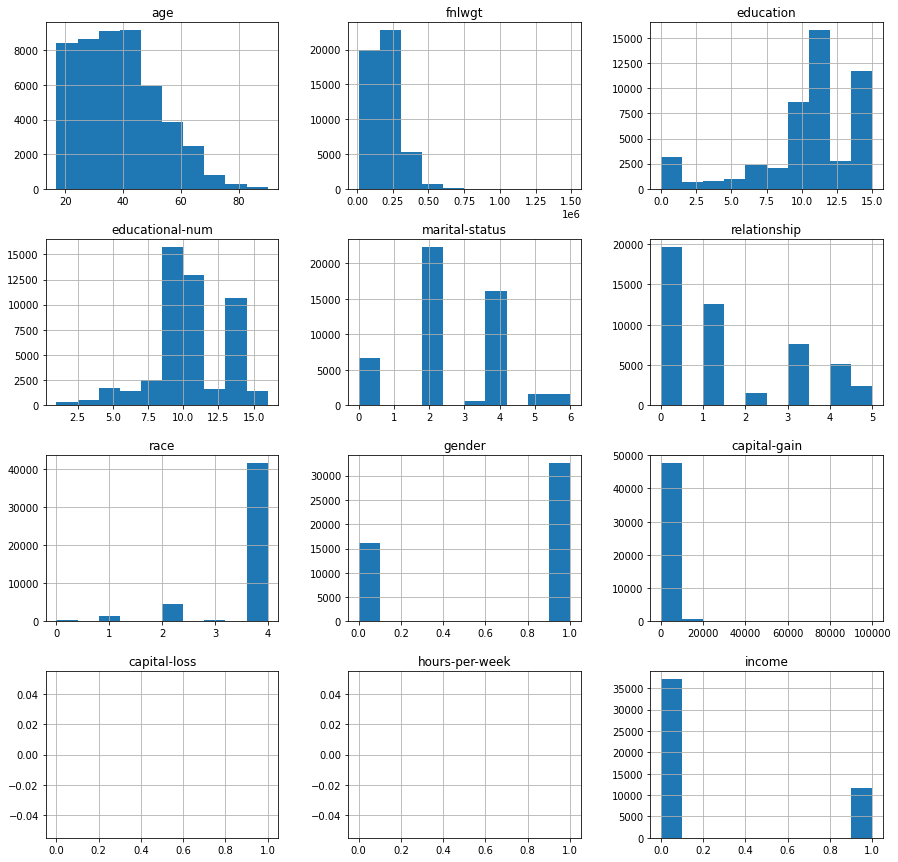

In [ ]:
p = df.hist(figsize = (15,15))

After plotting the figures we can see that there is some scope for clipping fnlwgt, capital loss and capital gain with vmax. 

In [ ]:
'''
TODO
Choose an appropriate maximum value to clip Capital Loss and Capital Gain values to and clip them accordingly
'''
df_standard = df.copy()
vmax_cap_gain = 0
vmax_cap_loss = 0
vmax_fnlwgt = 0
df_standard['capital-loss'] = df_standard['capital-loss']
df_standard['capital-gain'] = df_standard['capital-gain']
df_standard['fnlwgt'] = df_standard['fnlwgt']

In [ ]:
df_standard = df_standard.dropna(how = 'all')

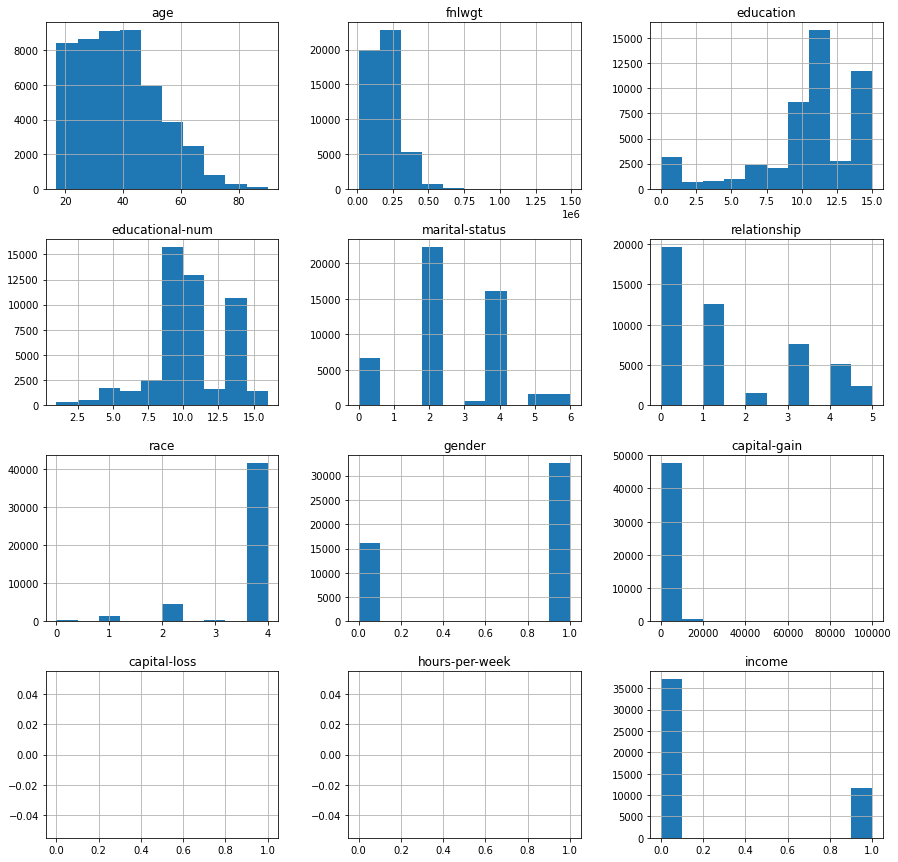

In [ ]:
# Let's plot the same graph for standardized data
p = df_standard.hist(figsize = (15,15))

ValueError: ignored

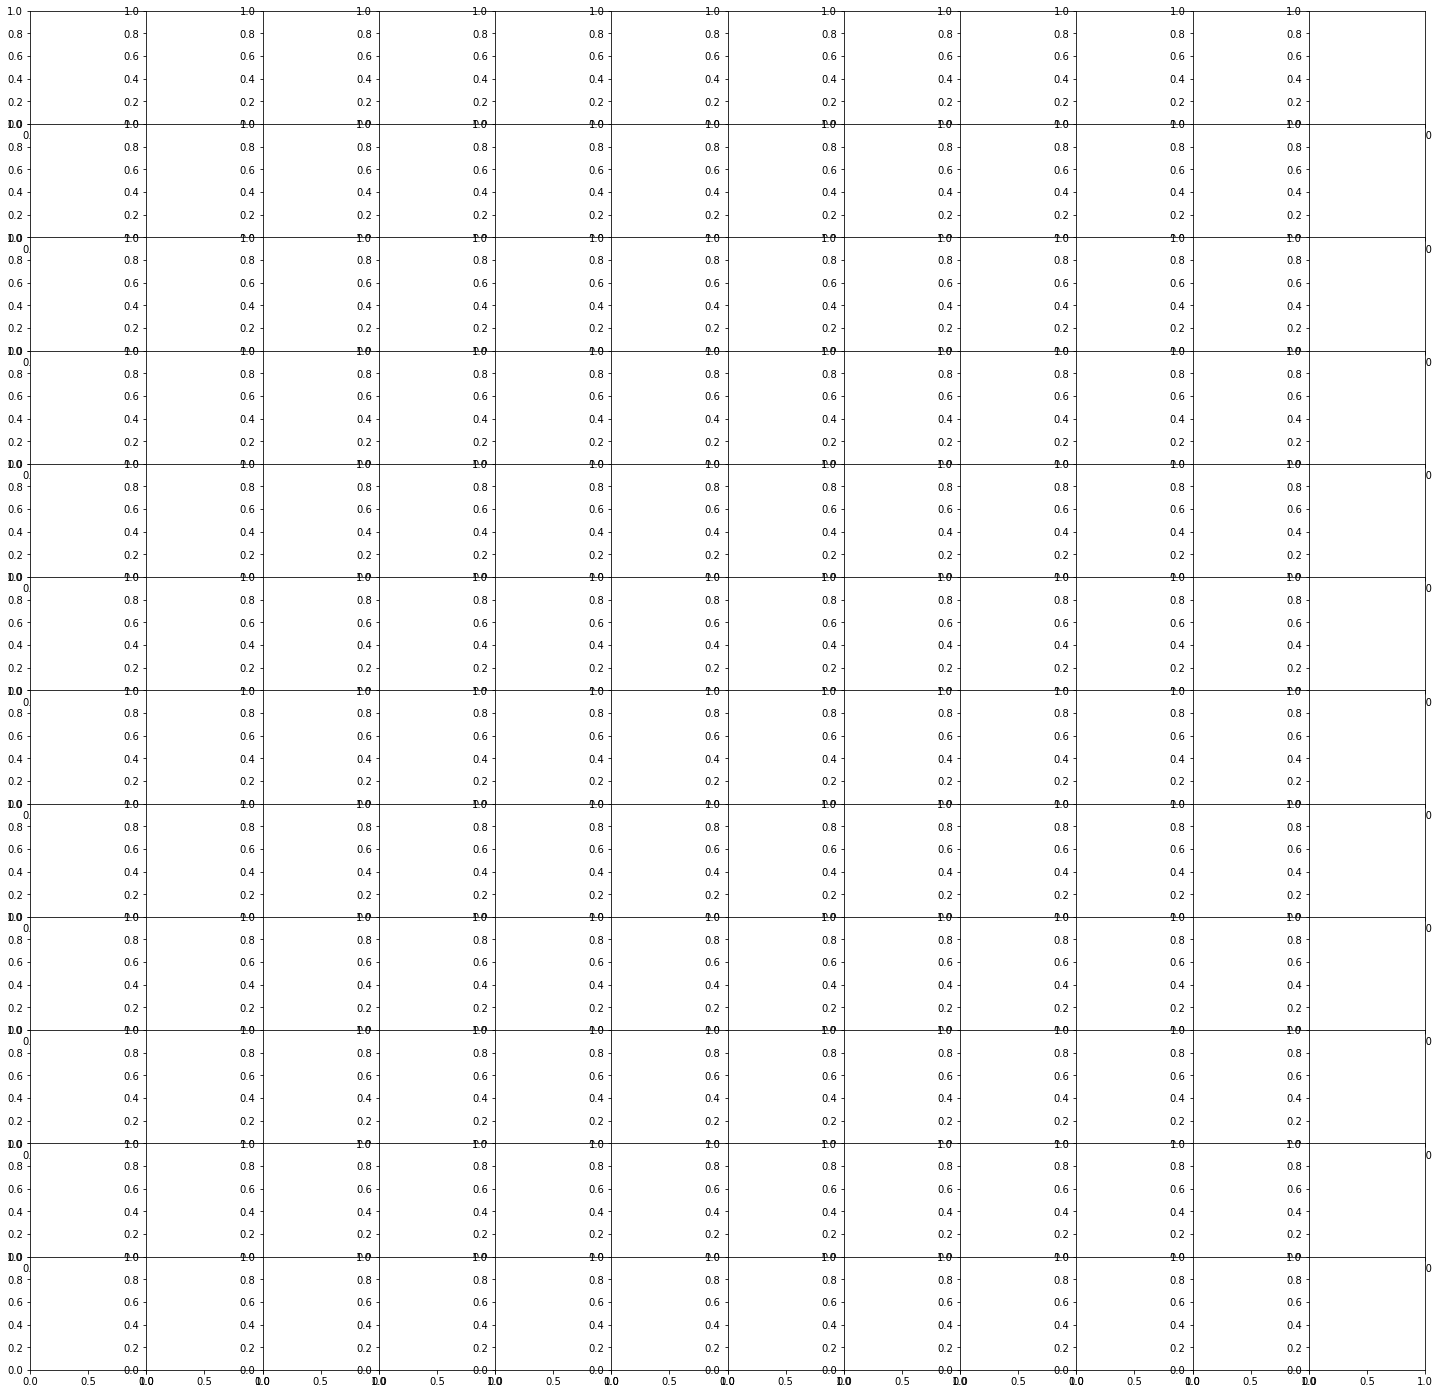

In [ ]:
# Let's plot the various features now and see if we can find any useless features not required for KNN
from pandas.plotting import scatter_matrix
p = scatter_matrix(df,figsize=(25, 25))


In [ ]:
# Let's analyse the same using correlation map. 
df.corr()

,age,fnlwgt,education,educational-num,marital-status,relationship,race,gender,capital-gain,capital-loss,hours-per-week,income
age,1.000000,-0.076451,-0.015142,0.030635,-0.263594,-0.263395,0.028803,0.088043,0.077185,NaN,NaN,0.230144
fnlwgt,-0.076451,1.000000,-0.022539,-0.038727,0.029779,0.009017,-0.027165,0.027879,-0.003715,NaN,NaN,-0.006309
education,-0.015142,-0.022539,1.000000,0.359825,-0.037449,-0.010861,0.013387,-0.027120,0.028958,NaN,NaN,0.080118
educational-num,0.030635,-0.038727,0.359825,1.000000,-0.069859,-0.090697,0.029331,0.009364,0.125219,NaN,NaN,0.332802
marital-status,-0.263594,0.029779,-0.037449,-0.069859,1.000000,0.187770,-0.070111,-0.127505,-0.043924,NaN,NaN,-0.198855
relationship,-0.263395,0.009017,-0.010861,-0.090697,0.187770,1.000000,-0.116985,-0.579955,-0.056543,NaN,NaN,-0.253175
race,0.028803,-0.027165,0.013387,0.029331,-0.070111,-0.116985,1.000000,0.086959,0.011610,NaN,NaN,0.070970
gender,0.088043,0.027879,-0.027120,0.009364,-0.127505,-0.579955,0.086959,1.000000,0.047127,NaN,NaN,0.214639
capital-gain,0.077185,-0.003715,0.028958,0.125219,-0.043924,-0.056543,0.011610,0.047127,1.000000,NaN,NaN,0.223047
capital-loss,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Observations
For the income column it is clear that no column directly affects the Income. We can safely assume that there no feature will completely overpower and determine the outcome. Hence, no need for regularization.  

0    37109
1    11681
Name: income, dtype: int64


<BarContainer object of 2 artists>

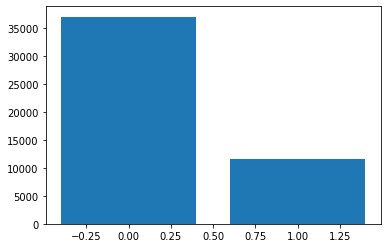

In [ ]:
# Checking if the data is biased
print(df['income'].value_counts())
plt.bar([0,1],df['income'].value_counts())

### Observations
There is a clear bias in the data and our model might end up giving income as 0 for most cases

In [ ]:
# Next we want to Z-Scale the data 
from sklearn.preprocessing import StandardScaler

In [ ]:
# TODO
# Write the code for z-transforming the data using StandardScalar class of sklearn which we have imported in the last cell. 
scaled_data = None

In [ ]:
df_scaled = pd.DataFrame(scaled_data,columns=df_standard.columns[:-1])
df_scaled.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix

In [ ]:
# Let's create a K-NN and compare the performances of scaled vs unscaled data. 
# We first create a function for performing KNN
##########################
##########################

## TODO : Complete the lines of code wherever marked as [REQUIRED] in this cell.

##########################
##########################


def plot_KNN_error_rate(xdata,ydata):
  error_rate = []
  test_scores = []
  train_scores = []

  ## [REQUIRED] Split the data into train and test sets in a 70:30 ratio (70% train, 30% test)
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state =0) ## Write your code here (expected lines ~ 1)
  
  for i in range(1,15):
      ## [REQUIRED] Complete the code in the next three lines
      knn =  knn = KNeighborsClassifier(n_neighbors=i)  ## Write your code here. Initialize the KNN classifier with 'i' neighbours (expected lines ~ 1)
      knn.fit(X_train,y_train) ## Write your code here. Fit the KNN model on the training set (expected lines ~ 1)
      pred_i = pred_i = knn.predict(X_test) ## Write your code here. Make predictions on the test set using KNN (expected lines ~ 1)
      
      error_rate.append(np.mean(pred_i != y_test))
      train_scores.append(knn.score(X_train,y_train))
      test_scores.append(knn.score(X_test,y_test))

  plt.figure(figsize=(12,8))
  plt.plot(range(1,15),error_rate,color='blue', linestyle='dashed', marker='o',
          markerfacecolor='red', markersize=10)
  plt.title('Error Rate vs. K Value')
  plt.xlabel('K')
  plt.ylabel('Error Rate')
  print()
  ## score that comes from testing on the same datapoints that were used for training
  max_train_score = max(train_scores)
  train_scores_ind = [i for i, v in enumerate(train_scores) if v == max_train_score]
  print('Max train score {} % and k = {}'.format(max_train_score*100,list(map(lambda x: x+1, train_scores_ind))))
  print()
  ## score that comes from testing on the datapoints that were split in the beginning to be used for testing solely
  max_test_score = max(test_scores)
  test_scores_ind = [i for i, v in enumerate(test_scores) if v == max_test_score]
  print('Max test score {} % and k = {}'.format(max_test_score*100,list(map(lambda x: x+1, test_scores_ind))))

  return test_scores


In [ ]:
# Unchanged dataset
orig_X = df.drop('income', axis = 1)
orig_y = df.income
unchanged_test_scores = plot_KNN_error_rate(orig_X, orig_y)

ValueError: ignored

In [ ]:
# Standardized Dataset
scaled_X = df_scaled
scaled_y = df_standard.income
scaled_test_scores = plot_KNN_error_rate(scaled_X, scaled_y)

ValueError: ignored

NameError: ignored

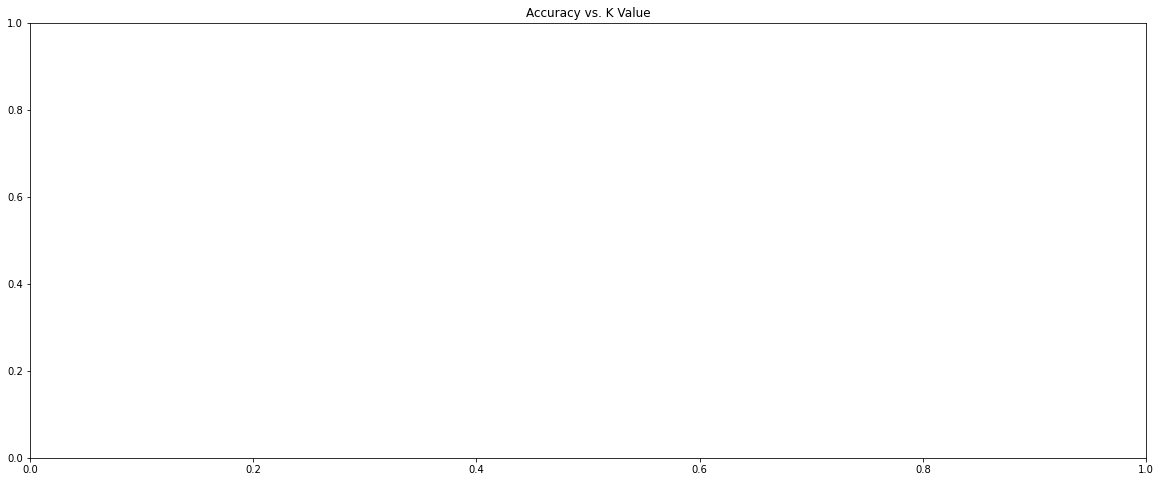

In [ ]:
# Comparing the two accuracies
import seaborn as sns
plt.figure(figsize=(20,8))
plt.title('Accuracy vs. K Value')
sns.lineplot(range(1,15),unchanged_test_scores,marker='o',label='Unscaled data test score')
sns.lineplot(range(1,15),scaled_test_scores,marker='o',label='Scaled data test Score')

In [ ]:
# TODO 
# Use Weighted KNN and compare the results of both the datasets
from sklearn.preprocessing import MinMaxScaler

columns_to_scale = ['age', 'capital.gain', 'capital.loss', 'hours.per.week']
mms = MinMaxScaler()
min_max_scaled_columns = mms.fit_transform(adult_new1[columns_to_scale])

adult_new1['age'],adult_new1['capital.gain'],adult_new1['capital.loss'],adult_new1['hours.per.week']= min_max_scaled_columns[:,0],
min_max_scaled_columns[:,1],min_max_scaled_columns[:,2],min_max_scaled_columns[:,3]



NameError: ignored

In [ ]:
# TODO
# Refer to MinMax Scaler provided in scikit-learn.  
dataset["sex"] = dataset["sex"].map({"Male":0, "Female":1})
## Use MinMax scaling on the dataset, and see the performance of KNN on this minmax-scaled dataset.

dataset["marital.status"]= dataset["marital.status"].replace(['Never-married', 'Divorced', 'Separated', 'Widowed'], 'Single')
dataset["marital.status"]= dataset["marital.status"].replace(['Married-civ-spouse', 'Married-spouse-absent', 'Married-AF-spouse'], 'Married')
dataset["marital.status"]= dataset["marital.status"].map({"Married":1, "Single":0})
dataset["marital.status"]= dataset["marital.status"].astype(int)


dataset.drop(labels =["workclass", "education", "occupation", "relationship", "race", "native.country"], axis = 1, inplace = True)
dataset.head()

dataset = dataset.drop('income', axis = 1)
dataset

X_train, X_test, y_train, y_test = train_test_split(dataset, y, test_size = 0.2, random_state =42)
models = []
models.append(('KNN', KNeighborsClassifier()))


NameError: ignored

In [ ]:
## TASK-8: Use K-Fold cross validation on all the above classification experiments and present an analysis of the results you obtain.
#K-fold cross validation
results = []
names = []
for name, model in models:
  kfold = KFold(n_splits=7, random_state = 0)
  cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring = 'accuracy')
  results.append(cv_results)
  names.append(name)
  msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
  print (msg)

# Conclusion

We carried out data analysis which helped us realise the missing values and helped us check if there is any visible bias in the data. 

As for the classification tasks, the standardized data yields much better results than the unscaled data over most of the K-values considered, thus indicating the importance of standardizing data in Machine Learning problems.

## References
https://www.kaggle.com/wenruliu/adult-income-dataset